# Chapter 02 : 최소 제곱법 모델
## 1. 최소 제곱법 모델이란?
목푯값의 샘플로 구성된 벡터 y와 p차원의 피처 행렬 X, 예측값 $\hat{y} = Xw$

### 최소 제곱법(ordinary least squares, OLS)
- 목푯값과 본 모델에서 도출되는 예측값을 이용해 비용 함수를 정의
- 비용 함수가 평균 제곱 오차(mean squared error, MSE)인 모델
- 예측값과 목푯값의 차이인 잔차(residual) 제곱합을 최소화하는 파라미터 w를 찾음

## 2. 정규 방정식으로 최소 제곱법 모델 구현하기
- 최소 제곱법(OLS)을 푸는 가장 기본적이고 직관적인 방법
- nxp 피처 행렬 X와 목푯값 y가 있고 n>p를 만족하며 선형 모델에서 통상적으로 절편이 추가되는 것을 고려 $\rightarrow$ p개의 피처 중 하나는 1로 구성된 상수 칼럼이라 가정
- X에 완전 다중공선성(perfect multicolinearity)이 없는 풀 칼럼 랭크(full column rank) 조건을 만족한다고 가정
#### 풀 칼럼 랭크 행렬
- n x p 차원의 행렬 X는 열벡터 $x_i$(1 $\leq$ i $\leq$ p)를 이용하여 $X = [x_1, x_2, ..., x_p]$로 나타낼 수 있음
- X의 열벡터가 선형적으로 독립인 것
- 모든 $w_1, w_2, ... w_p ∈ ℝ$에 대하여 방정식 $w_1x_1 + ... + w_px_p = 0$을 만족하는 해는 $w_1=w_2=...=w_p=0$ 뿐
- 풀 칼럼 랭크 행렬 조건은 OLS를 적용하기 위한 최소한의 필요 조건

#### 다중공선성
- 열벡터 사이의 종속성이 커서 한 열벡터를 다른 열벡터의 선형 결합으로 근사하기 쉬워지는 것
- 다중공선성이 커질수록 OLS로 얻은 해는 불안정해져 OLS는 사용하기 부적절한 모델이 됨

OLS는 y를 열벡터 X의 선형 결합과 오차항의 합으로 모델링
- y = Xw + ε

비용 함수 : 오차 제곱의 합 -> OLS는 오차 제곱의 합을 최소화하는 것을 목표로 함\
$J(w) = 	\parallel y - Xw	\parallel^2_2$\
$J(w) = (y - Xw)^T(y - Xw) = y^Ty - 2w^TX^Ty + w^TX^TXw$

비용 함수를 미분하여 최솟값에 대응하는 w를 찾음\
J(w)의 기울기가 0이 되는 지점\
$J(w)' = 0  \rightarrow -2X^Ty + 2X^TXw = 0$

정규 방정식 : $X^TXw = X^Ty$

X가 풀 칼럼 랭크일 때 $X^TX$는 역행렬\
$\hat{w} = (X^TX)^{-1}X^Ty$

극값이 최솟값인지 J(w)의 2계 도함수인 헤시안 H을 통해 확인\
$H = 2X^TX$

H가 양의 정부호 행렬이므로 위에서 얻어진 $\widehat{w}$은 J(w)를 전역으로 최소화함

#### 양의 정부호 행렬
- M이 대칭인 정사각행렬이고 0이 아닌 임의의 벡터 z가 주어졌을 때 $z^TMz$가 항상 0보다 크면 M을 양의 정부호 행렬이라고 함
- X가 nxp의 풀 칼럼 랭크 행렬이라면 $2X^TX$는 양의 정부호 행렬

#### 전역 최소화
- f : $\mathbb{R}^p \rightarrow \mathbb{R}$의 헤시안이 양의 정부호 행렬일 경우 f의 최솟값은 전역 최솟값
- $\widehat{w}$은 J(w)를 전역으로 최소화하는 값

### 정규 방정식 풀이의 시간 복잡도
피처 행렬 X가 nxp 차원일 때 정규 방정식을 이용한 OLS 풀이의 정차별 시간 복잡도
1. 행렬곱 $X^TX$ 계산 : $X^TX$ 구축에는 $O(np^2)$의 시간 복잡도 소요
2. 역행렬 $(X^TX)^{-1}$의 계산 : 구축한 $X^TX$가 대칭 행렬 $\rightarrow$ 역행렬은 숄래스키 분해를 이용, $X^TX$는 pxp 차원이므로 $O(p^3)$의 시간 복잡도 소요
3. $X^T$를 곱하여 $(X^TX)^{-1}X^T$를 계산 : pxp 행렬 $(X^TX)^{-1}$과 pxn 행렬 $X^T$의 곱에는 $O(np^2)$의 시간 복잡도 소요
4. y를 곱하여 $(X^TX)^{-1}X^Ty$를 계산 : pxn 행렬 $(X^TX)^{-1}X^T$와 nx1 행렬 y의 곱에는 $O(np)$의 시간 복잡도 소요

#### 숄레스키 분해
- 대칭 양의 정부호 행렬 M이 주어졌을 때 M을 다음과 같은 형태로 분해하는 하삼각행렬 L이 항상 존재
- $M = LL^T$
- M의 크기가 nxn일 때 숄레스키 문해의 시간 복잡도 : $O(n^3)$
- 숄레스키 분해를 적용할 수 있는 행렬이라면 매우 효율적으로 역행렬 구할 수 있으며, $O(n^3)$ 시간 복잡도 소요

In [3]:
# 정규 방정식으로 풀이 구현

import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# as_frame = False : X와 y를 numpy 배열로 입력
X, y = load_diabetes(return_X_y = True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

# reshape(-1, 1) 함수 : y의 두 번째 차원을 1이 되도록 생성
# reshape() 함수에서 특정 차원을 -1로 설정 : 나머지 주어진 차원과의 비교를 통해 적절한 차원으로 설정함
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

n_train, n_test = X_train.shape[0], X_test.shape[0]

In [4]:
# 절편을 모델에 포함하고자 X_train의 가장 왼쪽에 1로 구성된 상수 피처를 추가함
X_train = np.append(np.ones((n_train, 1)), X_train, axis = 1)

In [5]:
# 정규 방정식 (X^TX)^{-1}X^Ty를 풀어 파라미터 w를 구함
# @ : 행렬곱 연산자 (=np.matmul) 
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [6]:
# 구한 파라미터를 이용해 학습 데이터와 테스트 데이터의 예측값을 각각 계산, 비교
# 모델 성능은 평균 절대 오차(MAE)로 측정
y_pred_train = X_train @ w
print(f'학습 데이터셋 MAE : {np.abs(y_pred_train - y_train).mean() : .3f}')

X_test = np.append(np.ones((n_test, 1)), X_test, axis = 1)
y_pred = X_test @ w
print(f'테스트 데이터셋 MAE : {np.abs(y_pred - y_test).mean() : .3f}')

학습 데이터셋 MAE :  43.549
테스트 데이터셋 MAE :  42.618


### 정규 방정식 구현의 단점
- OLS에서의 파라미터 추정은 피처의 독립성 가정에 따라 이루어짐
- 피처 사이의 종속성이 커질수록 피처 행렬 X는 특이 행렬(singular matrix)에 가까워지므로 이때 OLS의 추정값은 목푯값의 작은 변동이나 오차에도 큰 변동이 생김 $\rightarrow$ 다중공선성이 발생

## 3. 특잇값 분해를 이용한 최소 제곱법 모델 구현하기
### 특잇값 분해(singular value decomposition, SVD)
- 행렬을 특수한 형태의 세 행렬의 곱으로 분해하는 것
- 머신러닝 분야에서 폭넓게 활용되고 있음
- n > p에 대해 피처 행렬 X가 nxp 차원을 가지는 풀 칼럼 랭크 행렬이가 가정 $\rightarrow$ X = U $\; \sum \; V^T$ (n x p = n x n, n x p, p x p)
- U와 V는 직교 행렬 $\sum$는 각각 대각 행렬
$\sum = \begin{pmatrix}
  \sigma_1 & \cdots & 0 \\
  \vdots & \ddots & \vdots \\
  0 & \cdots & \sigma_p \\
  \vdots & \ddots & \vdots \\
  0 & \cdots & 0
 \end{pmatrix}$
 - 대각 성분은 $X^TX$의 특잇값으로 정의
 - 왼쪽부터 $\sigma_1 \geq \cdots \sigma_r > \sigma_{r+1} = \cdots = \sigma_p = 0$
 - 특잇값 = $X^TX$의 고윳값 제곱근
 
 #### 직교 행렬(orthonormal matrix)
 행렬 A가 $A^TA = AA^T = I$를 만족할 때 해당 행렬이 직교 행렬
 
 #### 고윳값(eigenvalue)
 행렬 A에 대해 $\lambda$와 x가 $Ax = \lambda x$ 등식을 만족할 때 $\lambda$와 x를 각각 A의 고윳값(eigenvalue), 고유 벡터(eigenvector)라고 함
 
 ### 축약 SVD로 표현
 - $\sum$에서 대각 성분이 0인 모든 행을 걷어 내고 U에서도 이에 대응하는 모든 열을 걷어 내어 최소한의 크기로 X를 표현하는 것
 - X = $U_R \; \sum_R \; V^T$ (n x p = n x p, p x p, p x p)
 
 - 비용 함수에 X의 비축약 SVD 표현을 적용 $\rightarrow$ OLS 해를 도출
 $J_{OLS}(W) \; = \; \parallel y - Xw\parallel^2_2 \; = \; \parallel y - U \sum V^Tw \parallel^2_2 \; = \; \parallel U^T(y - U \sum V^Tw) \parallel^2_2 \; = \; \parallel U^2y - \sum V^Tw \parallel^2_2$
 - U가 직교 행렬이므로 $(y - U \sum V^Tw)$의 L2-norm == $U^T(y - U \sum V^Tw)$의 L2-norm
 - U의 i번째 열벡터 = $u_i$ $\rightarrow$ $U^Ty = \begin{pmatrix} u^T_1y\\ u^T_2y\\ \cdots\\ u^T_ny \end{pmatrix}$
 
 - $\omega = V^Tw, \; \sigma = \sum_{i, i}$로 정의하고 우측 항 정리
 $\sum V^Tw = \sum\omega = \begin{pmatrix} \sigma_1\omega_1\\ \cdots\\ \sigma_p\omega_p\\ 0\\ \cdots\\ 0 \end{pmatrix}$
 
 - 좌표별 제곱의 합의로 해석
 $\parallel U^Ty - \sum V^Tw\parallel^2_2 \; = \; \displaystyle\sum_{i = 1}^{p} (u^T_i y - \sigma_i\omega_i)^2 + \sum_{i = p + 1}^{n} (u^T_i y)^2$
 
 - $\sum_{i = p + 1}^{n} (u^T_i y)^2$ = 주어진 상수
 - $\displaystyle\sum_{i = 1}^{p} (u^T_i y - \sigma_i\omega_i)^2$ = 추정 대상 변수인 w의 함수
 - 비용 함수의 최솟값 = $\displaystyle\sum_{i = 1}^{p} (u^T_i y - \sigma_i\omega_i)^2$를 최소화하여 얻을 수 있음
 $\hat{\omega_i} \; = \; \frac{u^T_i y}{\sigma_i} \quad for \quad 1 \leq i \leq p$
 
 - $V^T$가 직교 행렬 $\rightarrow$ $V^T\hat{w} = \hat{\omega}$의 양변의 왼쪽에 V 곱하여 $\hat{w} = V\hat{\omega}$ 얻음
 $\hat{w} = \sum_{i = 1}^{p} \frac{u^T_i y}{\sigma_i}v_i$
 
 - 축약 SVD를 사용해 간단한 행렬식으로 표현
 $\hat{w} = V \; \sum_{R}^{-1} \; U^T_R y$ (p x 1 = p x p, p x p, p x n, n x 1)
 
 ### SVD-OLS 풀이의 시간 복잡도
 - SVD를 이용한 OLS 풀이의 절차별 시간 복잡도
 1. X의 축약 SVD, $X = U_R\sum_{R}V^T$ 분해의 시간 복잡도 : $O(np^2)$
   - 반올림 오차(rounding error) 때문에 특잇값이 정확히 0이 되지 않는 경우, 해당 값은 0으로 간주하여 제거
 2. $U_R^Ty$ 연산의 시간 복잡도 : $O(np)$
 3. $\sum_{R}^{-1}U_R^Ty$ 연산의 시간 복잡도 : $O(p)$ $\rightarrow$ $\sum_{R}^{-1}$이 정방 행렬이기 때문
 4. $V\sum_{R}^{-1}U_R^Ty$ 연산의 시간 복잡도 : $O(P^2)$
 - 전체 과정의 시간 복잡도는 정규 방정식 풀이의 시간 복잡도와 동일
 
 ### 정규 방정식 풀이의 단점과 SVD-OLS 풀이의 장점
 - 시간 복잡도 측면에서 유사하고 수학적으로 동일한 해를 산출
 - 행렬이 특이 행렬에 가까울 때는 수치적으로 다른 해를 산출
     - 입력 피처 행렬이 특이 행렬에 가까울수록 OLS 기법은 다중공선성이 커지며, 이에 따라 조건수가 증가
     - X에 SVD를 통해 얻어진 특잇값의 최댓값을 $\sigma_{max}(X)$, 0이 아닌 최솟값을 $\sigma_{min}(X)$라고 할 때 X의 조건수 : $cond(X) = \frac{\sigma_{max}(X)}{\sigma_{min}(X)}$
     - 조건수 X는 작은 변화에 방정식 y = Xw의 해가 얼마나 변동하는지의 측정치를 나타냄
     - 조건수가 커질수록 불안정성이 크다고 볼 수 있음 $cond(X^TX) = (cond(X))^2$

In [7]:
# 정칙 행렬(non-singular matrix)에서의 피처 조합과 특이 행렬(singular matrix)에 가까운 피처 조합에서
# 각각 정규 방정식을 사용한 해와 SVD를 사용한 해를 구한 후 이를 비교

import numpy as np

np.random.seed(1234)
X = np.random.randn(1000, 10)
Y = np.linspace(0, 1, len(X))

In [8]:
print(f'X의 조건수 : {np.linalg.cond(X)}')
print(f'X.T @ X의 조건수 : {np.linalg.cond(X.T @ X)}')
print(f'X 조건수 제곱과 X.T @ X 조건수의 비율 : {np.linalg.cond(X)**2 / np.linalg.cond(X.T @ X)}')  # X.T @ X의 조건수 = X의 조건수 제곱

X의 조건수 : 1.1884267654633278
X.T @ X의 조건수 : 1.4123581768696278
X 조건수 제곱과 X.T @ X 조건수의 비율 : 0.9999999999999999


In [9]:
# 정규 방정식과 SVD를 이용한 해 구하기
w_normal = (np.linalg.inv(X.T @ X)) @ X.T @ Y
w_svd, _, _, _ = np.linalg.lstsq(X, Y, rcond = None)

print('정규 방정식 풀이의 파라미터')
print(w_normal)
print()
print('SVD-OLS 풀이의 파라미터')
print(w_svd)
print()

# 두 해를 비교
# np.allclose() 함수 : 작은 허용 오차 내에서 두 배열이 같은지 비교
print(f'두 해가 허용 오차 범위에서 같은지를 판별한 결과 : {np.allclose(w_normal, w_svd)}')

정규 방정식 풀이의 파라미터
[-0.00359211 -0.02161286  0.03721239  0.01295562  0.02589346  0.03504966
  0.00965059 -0.00626938 -0.01841618 -0.02176516]

SVD-OLS 풀이의 파라미터
[-0.00359211 -0.02161286  0.03721239  0.01295562  0.02589346  0.03504966
  0.00965059 -0.00626938 -0.01841618 -0.02176516]

두 해가 허용 오차 범위에서 같은지를 판별한 결과 : True


In [10]:
# 두 번째 피처의 값을 첫 번째 피처에 아주 작은 크기의 노이즈를 더한 것으로 정의 -> 두 피처 간의 종속성이 매우 커지도록 설정

np.random.seed(1234)
X[:, 0] = X[:, 1] + 1e-10 * np.random.randn(len(X))

print(f'X의 조건수 : {np.linalg.cond(X)}')
print(f'X.T @ X의 조건수 : {np.linalg.cond(X.T @ X)}')
print(f'X의 조건수 제곱과 X.T @ X 조건수의 비율 : {np.linalg.cond(X)**2 / np.linalg.cond(X.T @ X) : .3f}')

# 수치적 불안정성 때문에 cond(X)**2와 cond(X.T @ X)의 차이가 크게 발생

X의 조건수 : 20373019026.28229
X.T @ X의 조건수 : 7998829117931501.0
X의 조건수 제곱과 X.T @ X 조건수의 비율 :  51890.083


In [11]:
# 정규 방정식과 SVD를 이용한 해 구하기
w_normal = (np.linalg.inv(X.T @ X)) @ X.T @ Y
w_svd, _, _, _ = np.linalg.lstsq(X, Y, rcond = None)

print('정규 방정식 풀이의 파라미터')
print(w_normal)
print()
print('SVD-OLS 풀이의 파라미터')
print(w_svd)
print()

# 두 해를 비교
# np.allclose() 함수 : 작은 허용 오차 내에서 두 배열이 같은지 비교
print(f'두 해가 허용 오차 범위에서 같은지를 판별한 결과 : {np.allclose(w_normal, w_svd)}')

정규 방정식 풀이의 파라미터
[ 1.20132134e+02 -1.20153550e+02  3.72810002e-02  1.29691651e-02
  2.56539800e-02  3.49624606e-02  9.65405634e-03 -6.30072775e-03
 -1.83916697e-02 -2.17846524e-02]

SVD-OLS 풀이의 파라미터
[-6.81391668e+06  6.81391665e+06  3.72919037e-02  1.29792825e-02
  2.56644051e-02  3.50019923e-02  9.65402535e-03 -6.34375740e-03
 -1.84209465e-02 -2.17374937e-02]

두 해가 허용 오차 범위에서 같은지를 판별한 결과 : False


In [12]:
# SVD를 통해 OLS의 해를 풀이하는 방법

import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y = True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

n_train, n_test = X_train.shape[0], X_test.shape[0]

X_train = np.append(np.ones((n_train, 1)), X_train, axis = 1)
X_test = np.append(np.ones((n_test, 1)), X_test, axis = 1)

In [13]:
# 피처 행렬 X에 SVD를 적용 -> U, S, Vh 산출

u, s, vh = np.linalg.svd(X_train, full_matrices = False)

w = vh.T @ np.linalg.inv(np.diag(s)) @ u.T @ y_train
y_pred_train = X_train @ w
print(f'학습 데이터셋 MAE : {np.abs(y_pred_train - y_train).mean() : .3f}')

y_pred = X_test @ w
print(f'테스트 데이터셋 MAE : {np.abs(y_pred - y_test).mean() : .3f}')

학습 데이터셋 MAE :  43.549
테스트 데이터셋 MAE :  42.618


## 4. TSVD-OLS을 이용한 모델 구현하기
### TSVD(truncated SVD)-OLS 기법
- 피처 행렬이 매우 불안정하면 이를 해결하고자 파라미터의 크기를 규제하는 방법 중 하나
- 작은 특잇값을 제거하여 피처 행렬을 안정적인 형태로 근사하고 해를 풀이하는 방법
- $\sum$의 모든 특잇값 대신 k개(0<k<p)의 가장 큰 특잇값만 선택한 후 나머지 부분을 제거하고 제거한 부분에 대응하는 U의 열과 $V^T$의 행을 버려 X를 근사
- $\;$ X $\;$ $\approx$ $\;$ $X_t$ $\;$ = $\;$ $U_t$ $\;$ $\sum_t$ $\;$ $V_t^T$
- (nxp)$\quad$(nxp)$\quad$(nxk)$\;$(kxk)$\;$(kxp)

- TSVD-OLS의 해는 $X_t$에 SVD 적용하면 얻을 수 있음
- $\;$ $\hat{w}$ $\;$ = $\;$ $V_t$ $\;$ $\sum_{t}^{-1}$ $\;$ $U_t^T$ $\;$ y
- (px1)$\quad$(pxk)$\;$(kxk)$\;$(kxn)$\;$(nx1)

- TSVD-OLS의 해 : SVD-OLS의 해에서 가장 큰 크기 순으로 k개의 특잇값만을 남긴 형태
- $\hat{w}$ $\;$ = $\displaystyle\sum_{i = 1}^{k} \frac{u_i^T y}{\sigma_i}v_i$
- 기존 해와 다르게 학습 데이터의 최적해가 아닌 편향된 해
- 매우 불안정한 피처 행렬에도 강건한 성질을 가짐

#### k의 선택 기준
- $X_t$의 조건수가 일정 임계값 밑으로 내려가게 하는 것
- cond($X_i$) = $\frac{\sigma_{max}}{\sigma_{min}}$
- 일부 특잇값을 제거하여 $\sigma_{min}$의 값을 일정 수준 이상으로 올리면 조건수를 임계값 아래로 떨어뜨릴 수 있음

TSVD-OLS 풀이는 SVD-OLS에서 일부 특잇값을 제거하는 형태 $\rightarrow$ 시간 복잡도는 정규 방정식 풀이 or SVD-OLS 풀이와 같음

In [14]:
# TSVD-OLS을 이용한 풀이 구현하기

import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
%matplotlib inline

X, y = load_diabetes(return_X_y = True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

n_train, n_test = X_train.shape[0], X_test.shape[0]

In [16]:
X_train = np.append(np.ones((n_train, 1)), X_train, axis = 1)
X_test = np.append(np.ones((n_test, 1)), X_test, axis = 1)

u, s, vh = np.linalg.svd(X_train, full_matrices = False)
print('sigma 값')
print(s)

# s의 대각 성분은 왼쪽 위에서 오른쪽 아래로 내려갈수록 감소 -> 작은 값일수록 해의 불안정성에 끼치는 영향이 큼

sigma 값
[17.20470826  1.63118993  0.9658949   0.85050337  0.81673431  0.66217439
  0.62557419  0.5856106   0.569322    0.22995993  0.07211034]


In [19]:
# 0.5 정도의 임계값을 고려하여 s의 마지막 두 원소에 해당하는 부분을 삭제
# 삭제 후 근사한 u, s, vh을 이용해 TSVD-OLS 해를 구함
# 해로 얻은 학습 데이터셋과 테스트 데이터셋을 기준으로 각각의 평균 절대 오차(MAE)를 계산

num_trunc = 2

vh = vh[:-num_trunc, :]
s = s[:-num_trunc]
u = u[:, :-num_trunc]

w = vh.T @ np.linalg.inv(np.diag(s)) @ u.T @ y_train
y_pred_train = X_train @ w
print(f'학습 데이터셋 MAE : {np.abs(y_pred_train - y_train).mean() : .3f}')

y_pred = X_test @ w
print(f'테스트 데이터셋 MAE : {np.abs(y_pred - y_test).mean() : .3f}')

# 특잇값 2개를 제거했을 때 SVD-OLS와 해가 별로 차이나지 않음
# 안정적인 데이터셋일 때 많은 수의 특잇값을 제거하는 것은 정보 보존 측면과 편향 발생 측면에서 좋지 않음

학습 데이터셋 MAE :  43.659
테스트 데이터셋 MAE :  42.808


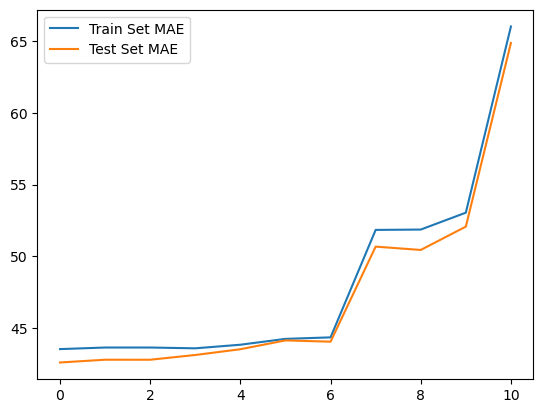

In [21]:
# 제거하는 특잇값의 수에 따른 학습 데이터셋과 테스트 데이터셋에서의 MAE

train_maes = []
test_maes = []

num_truncs = range(X_train.shape[1])

for num_trunc in num_truncs:
    u, s, vh = np.linalg.svd(X_train, full_matrices = False)
    
    if (num_trunc != 0):
        vh = vh[:-num_trunc, :]
        s = s[:-num_trunc]
        u = u[:, :-num_trunc]
        
    w = vh.T @ np.linalg.inv(np.diag(s)) @ u.T @ y_train
    y_pred_train = X_train @ w
    
    train_maes.append(np.abs(y_pred_train - y_train).mean())
    
    y_pred = X_test @ w
    
    test_maes.append(np.abs(y_pred - y_test).mean())
    
plt.plot(num_truncs, train_maes, label = 'Train Set MAE')
plt.plot(num_truncs, test_maes, label = 'Test Set MAE')
plt.legend()

# 제거하는 특잇값의 수가 6보다 커짐에 따라 학습 데이터셋과 테스트 데이터셋에서의 MAE가 모두 급격하게 상승하는 것을 확인
# 정보를 보존하는 측명에서 불안정성에 영향을 끼치는 일부 sigma만 삭제하는 것이 바람직

In [22]:
# 불안정한 피처 행렬이 주어진 상황에서 SVD-OLS 해와 TSVD-OLS 해를 각각 구하고
# 그 결과에 대한 안정성을 테스트 데이터셋으로의 일반화 가능성 측면에서 비교

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

X = pd.DataFrame({})
F = [10**-i for i in range(11)]
for i in range(6):
    X['F' + str(i)] = [j**i for j in F]
    
w = np.ones(6)
y = X @ w

X = X.sample(frac = 1, random_state = 1234)
split = 5

X_train, y_train = X.iloc[:split, :], y.iloc[:split]
X_test, y_test = X.iloc[split:, :], y.iloc[split:]
X

,F0,F1,F2,F3,F4,F5
8,1.0,1.000000e-08,1.000000e-16,1.000000e-24,1.000000e-32,1.000000e-40
2,1.0,1.000000e-02,1.000000e-04,1.000000e-06,1.000000e-08,1.000000e-10
9,1.0,1.000000e-09,1.000000e-18,1.000000e-27,1.000000e-36,1.000000e-45
10,1.0,1.000000e-10,1.000000e-20,1.000000e-30,1.000000e-40,1.000000e-50
1,1.0,1.000000e-01,1.000000e-02,1.000000e-03,1.000000e-04,1.000000e-05
0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
7,1.0,1.000000e-07,1.000000e-14,1.000000e-21,1.000000e-28,1.000000e-35
4,1.0,1.000000e-04,1.000000e-08,1.000000e-12,1.000000e-16,1.000000e-20
5,1.0,1.000000e-05,1.000000e-10,1.000000e-15,1.000000e-20,1.000000e-25
6,1.0,1.000000e-06,1.000000e-12,1.000000e-18,1.000000e-24,1.000000e-30


In [23]:
# 학습 데이터에 SVD-OLS를 적용 -> 해 w를 구함
# 해를 대입해 학습 데이터셋에서의 MAE와 테스트 데이터셋에서의 MAE 각각 산출

u, s, vh = np.linalg.svd(X_train, full_matrices = False)

w_svd = vh.T @ np.linalg.inv(np.diag(s)) @ u.T @ y_train
print(f'SVD-OLS 풀이의 파라미터')
print((w_svd))

y_pred_train = X_train @ w_svd
print(f'학습 데이터셋 MAE : {np.abs(y_pred_train - y_train).mean() : .3f}')

y_pred = X_test @ w_svd
print(f'테스트 데이터셋 MAE : {np.abs(y_pred - y_test).mean() : .3f}')

# SVD-OLS 해의 크기가 매우 크게 결정된 것을 확인
# 학습 데이터셋 MAE에 비해 테스트 데이터셋 MAE가 매우 큰 값
# -> 학습 데이터셋에서의 피처의 불안정성이 커서 해의 일반화 가능성이 크게 낮아짐

SVD-OLS 풀이의 파라미터
[ 9.65925492e-01  5.01535382e+07  4.53254411e+16 -4.98126874e+18
  4.48271096e+19  4.53033580e+18]
학습 데이터셋 MAE :  0.080
테스트 데이터셋 MAE :  1524631.199


In [24]:
# TSVD-OLS에서의 해를 구함

u, s, vh = np.linalg.svd(X_train, full_matrices = False)

print(f'SVD의 Sigma 값')
print(s)

# TSVD 구현 부분에서의 s의 형태와 달리 현재 s의 대각 성분이 급격하게 감소함
# 0에 한없이 가까운 sigma의 값들은 이 피처 행렬이 얼마나 불안정한지 나타냄

SVD의 Sigma 값
[2.23661449e+00 8.80680977e-02 7.96217717e-04 7.74208232e-12
 7.25331827e-21]


In [25]:
# 1e-10보다 작은 2개의 sigma에 해당하는 정보를 제거

num_trunc = 2

u, s, vh = np.linalg.svd(X_train, full_matrices = False)

vh, s, u = vh[:-num_trunc, :], s[:-num_trunc], u[:, :-num_trunc]

w_tsvd = vh.T @ np.linalg.inv(np.diag(s)) @ u.T @ y_train
print(f'TSVD-OLS 풀이의 파라미터')
print(w_tsvd)

y_pred_train = X_train @ w_tsvd
print(f'학습 데이터셋 MAE : {np.abs(y_pred_train - y_train).mean() : .3f}')

y_pred = X_test @ w_tsvd
print(f'테스트 데이터셋 MAE : {np.abs(y_pred - y_test).mean() : .3f}')

# 여전히 해 w_tsvd가 크고 학습 데이터셋과 테스트 데이터셋에서의 MAE가 큰 차이가 있음
# 하지만 앞선 SVD-OLS와 비교하면 상당히 안정적인 해를 얻음

TSVD-OLS 풀이의 파라미터
[   2.67036682 -171.22435533 1528.21782961  168.27519134   16.98205322
    1.69975066]
학습 데이터셋 MAE :  0.106
테스트 데이터셋 MAE :  1.670


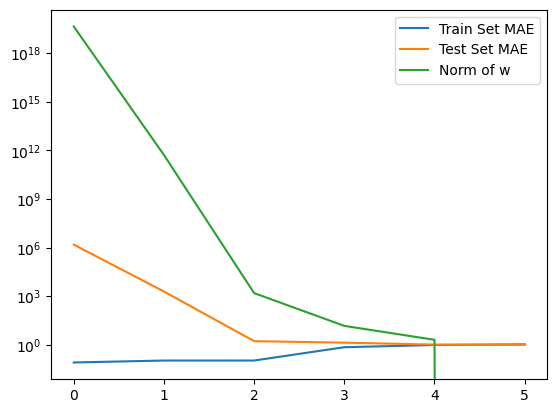

In [26]:
# 절삭한 특잇값의 수에 따라 학습 데이터셋 MAE와 테스트 데이터셋 MAE, 해 w의 크기가 어떻게 바뀌는지 확인

num_truncs = range(X_train.shape[1])
mae_train, mae_test, ws = [], [], []
for num_trunc in num_truncs:
    u, s, vh = np.linalg.svd(X_train, full_matrices = False)
    
    if (num_trunc != 0):
        vh = vh[:-num_trunc, :]
        s = s[:-num_trunc]
        u = u[:, :-num_trunc]
        
    w = vh.T @ np.linalg.inv(np.diag(s)) @ u.T @ y_train
    
    y_pred_train = X_train @ w
    mae_train.append(np.abs(y_pred_train - y_train).mean())
    
    y_pred = X_test @ w
    mae_test.append(np.abs(y_pred - y_test).mean())
    
    ws.append(np.linalg.norm(w))
    
plt.yscale('log')   # 적절한 시각화를 위해 새로축을 로그 스케일로 나타냄
plt.plot(num_truncs, mae_train, label = 'Train Set MAE')
plt.plot(num_truncs, mae_test, label = 'Test Set MAE')
plt.plot(num_truncs, ws, label = 'Norm of w')
plt.legend()

# 절삭의 크기가 커짐에 따라 w의 크기와 테스트 데이터셋에서의 MAE가 크게 감소
# 하지만 4 이상의 절삭 이후로는 w의 크기가 0으로 감쇄 -> 모델로서의 의미 없어짐
# 해당 예제에서는 2 전후로 절삭하는 것이 바람직

## 5. 패키지로 표현하기
### sklearn.linear_model.LinearRegression 클래스
- 선형 회귀 모델인 OLS 모델을 SVD를 이용해 추정
- scipy.linalg.lstsq() 함수 이용해 구현
- fit_intercept 하이퍼파라미터 : 절편 포함 여부 결정
- positive 하이퍼파라미터 : NNLS(비음수 최소 제곱법) 적용 여부 결정
- $min_{w\geq0}$$\parallel$y - Xw$\parallel_2^2$
- NNLS은 scipy.optimize.nnls() 함수로 구현

In [27]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

In [28]:
# reg 객체를 정의해 모델을 학습하고 이를 평가

reg = LinearRegression()
reg = reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)

print(f'학습 데이터셋 MAE : {np.abs(y_pred_train - y_train).mean() : .3f}')

y_pred = reg.predict(X_test)
print(f'테스트 데이터셋 MAE : {np.abs(y_pred - y_test).mean() : .3f}')

# 앞의 정규 방정식 풀이 결과 및 SVD-OLS 결과와 소수점 셋째 자리가지 동일
# 패키지의 계산 결과와 정규 방정식 및 SVD-OLS 계산 결과는 소수점 열 번째 자리 이상까지 동일
# OLS 기법은 모델 구성과 알고리즘 형태가 매우 간단하여 일반적으로 직접 구현한 결과와 패키지 구현의 차이가 거의 발생하지 않음

학습 데이터셋 MAE :  43.549
테스트 데이터셋 MAE :  42.618


## 6. 최소 제곱법 모델 보충 수업
### 통계 모델로서의 OLS
- 통계학 관점에서 OLS : $y = w_0 + w_1x_1 + \dots + w_px_p + \epsilon$
- 오차항 $\epsilon$의 정규성(normality), 등분산성(homoscedasticity), 자기상관(autocorrelation)의 부재, 그리고 $E[\epsilon|X] = 0$등의 조건을 만족할 때 파라미터의 신뢰구간과 유의 확률 등을 계산할 수 있음 $\rightarrow$ statsmodels 패키지로 수행 가능

### 결정 계수
- OLS에서는 결정 계수(coefficient of determination)라고도 불리는 $R^2$을 예측력의 성과 지표로 사용하기도 함
- i번째 목푯값 y의 예측값 : $\hat{y_i}$
- $y_i$의 평균 : $\overline{y}$\
$R^2$ = $1 - \frac{잔차\,제곱합}{편차\,제곱합}$ = $1 - \frac{\displaystyle\sum_{i = 1}^{n} (y_i - \hat{y_i})^2}{\displaystyle\sum_{i = 1}^{n} (y_i - \overline{y})^2}$\

$R^2$의 특징
- $R^2$은 항상 1 이하이고 적합 후 학습 데이터에 대한 $R^2$값은 0 이상이다.
- 단, 적합 후 테스트 데이터로 $R^2$을 구할 때에는 음수가 나올 수도 있다.
- 모든 피처를 버리고 상수만 추정에 사용하는 상수 모델(constant model)을 학습 데이터에 적용할 때 모든 i에 대하여 $\hat{y_i} = \overline{y}$라고 추정하므로 $R^2$은 0이 된다.

### 화이트 박스 모델과 블랙 박스 모델
- 해석력(interpretability) : 학습한 모델의 예측 결과를 사람이 얼마나 쉽게 해셕할 수 있는지 나타냄
- 내부 구조와 판단 논리(logic)를 이해하기 쉬울수록 해석력이 높은 모델
- 해석력은 모델의 예측력과는 별개의 개념
- 예측력이 아무리 낮아도 모델이 각각의 예측값을 산출한 이유에 대해서 쉽게 파악할 수 있다면 그 모델은 해석력이 높음
- 모델의 해석력이 높으면 개발자는 데이터로부터 의미 있는 정보를 학습했음을 사후에 확인할 수 있고, 사용자는 모델로 내린 결정을 믿고 확신할 수 있기 때문에 활용성이 높음
- OLS 모델은 해석력이 가장 높은 모델 중 하나

화이트 박스 모델(white box model) : 해석력이 높은 모델
- 선형 모델, 결정 트리 모델, K-최근접 이웃(K-nearest neighbors, KNN)

블랙 박스 모델(black box model) : 해석력이 낮은 모델
- 값을 넣을 때마다 원하는 값이 나오지만 어떻게 그 값을 얻었는지는 가늠하기 어렵다는 뜻
- 결과를 검토하기 어려우므로 예측력이 아무리 좋아도 해석력이 낮은 모델에는 예측의 리스크가 있음

### 2장 되새김 문제
#### 1. LinearRegression 클래스 적용하기
- 당뇨병 데이터셋을 통해 1년 후 당뇨병 진행 정도를 예측하는 모델을 개발하고자 함
- 학습 데이터셋을 기준으로 예측 모델을 만들고 테스트 데이터셋으로 이를 테스트함

In [31]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y = True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

reg = LinearRegression()
reg = reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(f'RMSE : {np.sqrt(((y_pred - y_test)**2).mean()) : .3f}')

RMSE :  52.917


#### 2. 계수가 양수인 OLS 모델
- 당뇨병 위험 지수를 만들고 이를 공개해 시민에게 당뇨병에 대한 경각심을 일깨우고자 함
- 당뇨병 발발에 영향을 끼치는 요인을 추린 후 이들의 가중합으로 지수를 구성하고자 함
- 적절한 가중치에 대해 구상하던 중 영향 요인과 당뇨병 진행 정도를 모두 제공하는 공개된 당뇨병 데이터셋이 있다는 사실 발견
- 이에 따라 선형 회귀로 당뇨병 진행 정도에 해당하는 target 변수를 요인 bmi, bp, s1, ..., s6으로 회귀 분석한 다음, 얻은 계수를 추후 가중치호 변환하여 활용하고자 함
- 단, 음수 가중치를 사용하지 않으므로 모든 계수의 값이 0 이상이 되도록 조건을 강제하고자 함

In [34]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y = True, as_frame = True)
X = X[['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]

reg = LinearRegression(positive = True).fit(X, y)
print('계수')
print(reg.coef_)

계수
[585.32306094 257.89983408   0.           0.           0.
  68.07534057 496.65568471  31.84470422]
